# Visualise the item answers of some scales, divided on whether items flipped and/or reversed

In [2]:
# packages
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from utils import load_dataframes, filter_pred_prob

In [3]:
# load data
SSSV_data = load_dataframes(task_name="SSSV")

Merged DataFrame shape: (2776560, 8)
Total models: 46


In [4]:
# normalise answer option sum to one
SSSV_data["prob_1"] = np.exp(SSSV_data["1"])/(np.exp(SSSV_data["1"]) + np.exp(SSSV_data["2"]))
SSSV_data["prob_2"] = np.exp(SSSV_data["2"])/(np.exp(SSSV_data["1"]) + np.exp(SSSV_data["2"]))

In [5]:
# filter out probability LLM assigned to real item answer 
SSSV_data=filter_pred_prob(SSSV_data)

In [6]:
# add whether item was reverse coded
reverse_coded = {
     1: True, 2: False, 3: True, 4: False, 5: True, 6: True, 7: False, 8: True, 9: True, 10: False, 
     11: False, 12: False, 13: False, 14: True, 15: False, 16: True, 17: True, 18: True, 19: False, 20: False,
     21: False, 22: True, 23: True, 24: True, 25: False, 26: False, 27: False, 28: True, 29: True, 30: False,
     31: False, 32: True, 33: False, 34: True, 35: False, 36: True, 37: False, 38: False, 39: True, 40: False

}

# Apply mapping row-wise based on item number
SSSV_data["reverse_coded"] = SSSV_data["item"].map(reverse_coded)


In [7]:
import pandas as pd

SSSV_data["subgroup"] = SSSV_data["flipped"].astype(str) + "_" + SSSV_data["reverse_coded"].astype(str)


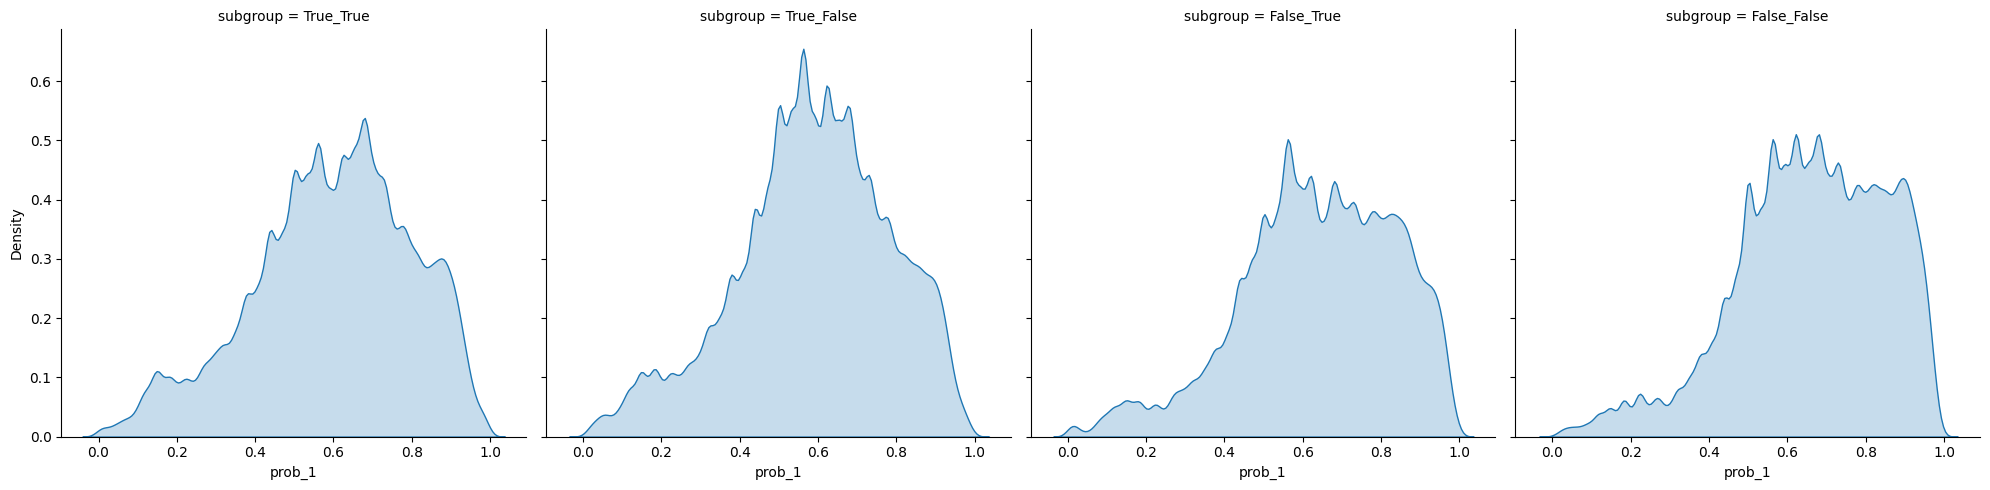

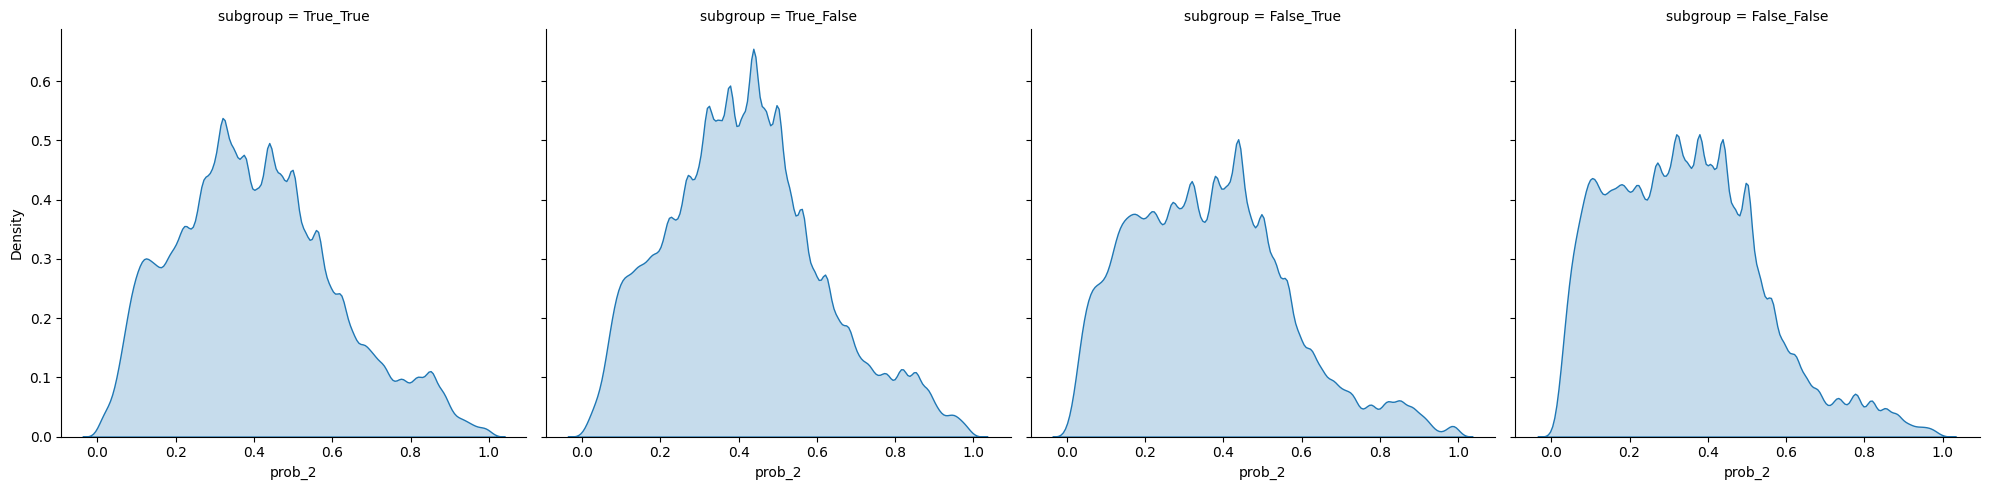

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(
    SSSV_data,
    x="prob_1",
    col="subgroup",
    kind="kde",
    fill=True
)
plt.show()

sns.displot(
    SSSV_data,
    x="prob_2",
    col="subgroup",
    kind="kde",
    fill=True
)
plt.show()


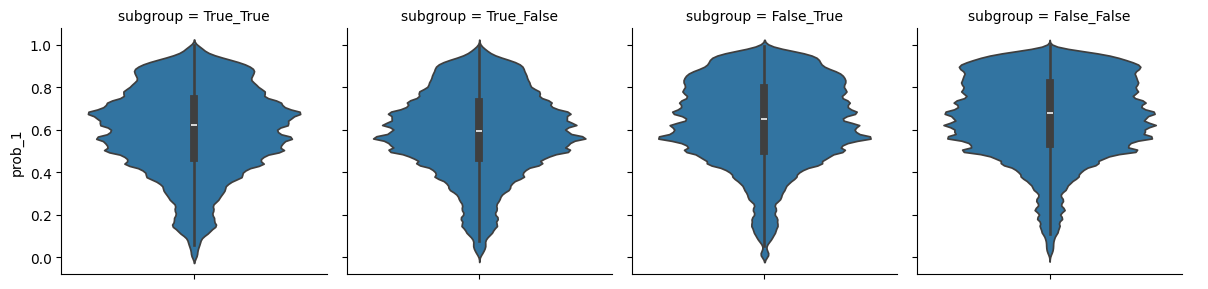

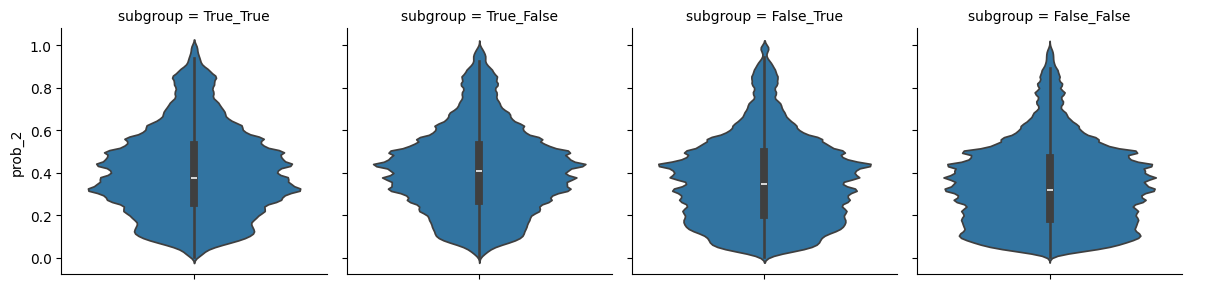

In [9]:
for var in ["prob_1", "prob_2"]:
    sns.catplot(
        data=SSSV_data,
        y=var,
        col="subgroup",
        kind="violin",
        height=3,
        aspect=1
    )


# same test for BARRAT

In [10]:
# load data
BARRAT_data = load_dataframes(task_name="BARRAT")

Merged DataFrame shape: (2082420, 10)
Total models: 46


In [11]:
# normalise answer option sum to one
BARRAT_data["prob_1"] = np.exp(BARRAT_data["1"])/(np.exp(BARRAT_data["1"]) + np.exp(BARRAT_data["2"]) + np.exp(BARRAT_data["3"]) + np.exp(BARRAT_data["4"]))
BARRAT_data["prob_2"] = np.exp(BARRAT_data["2"])/(np.exp(BARRAT_data["1"]) + np.exp(BARRAT_data["2"]) + np.exp(BARRAT_data["3"]) + np.exp(BARRAT_data["4"]))
BARRAT_data["prob_3"] = np.exp(BARRAT_data["3"])/(np.exp(BARRAT_data["1"]) + np.exp(BARRAT_data["2"]) + np.exp(BARRAT_data["3"]) + np.exp(BARRAT_data["4"]))
BARRAT_data["prob_4"] = np.exp(BARRAT_data["4"])/(np.exp(BARRAT_data["1"]) + np.exp(BARRAT_data["2"]) + np.exp(BARRAT_data["3"]) + np.exp(BARRAT_data["4"]))


In [12]:
# filter out probability LLM assigned to real item answer 
BARRAT_data=filter_pred_prob(BARRAT_data)

In [13]:
# add whether item was reverse coded
reverse_coded = {
    1: True, 2: False, 3: False,  4: False, 5: False,  6: False,  7: True,  8: True,  9: True,  10: True,
    11: False, 12: True, 13: True,  14: False, 15: True,  16: False,  17: False,  18: False,  19: False,  20: True,
    21: False, 22: False, 23: False,  24: False, 25: False,  26: False,  27: False,  28: False,  29: True,  30: True
    }

# Apply mapping row-wise based on item number
BARRAT_data["reverse_coded"] = BARRAT_data["item"].map(reverse_coded)



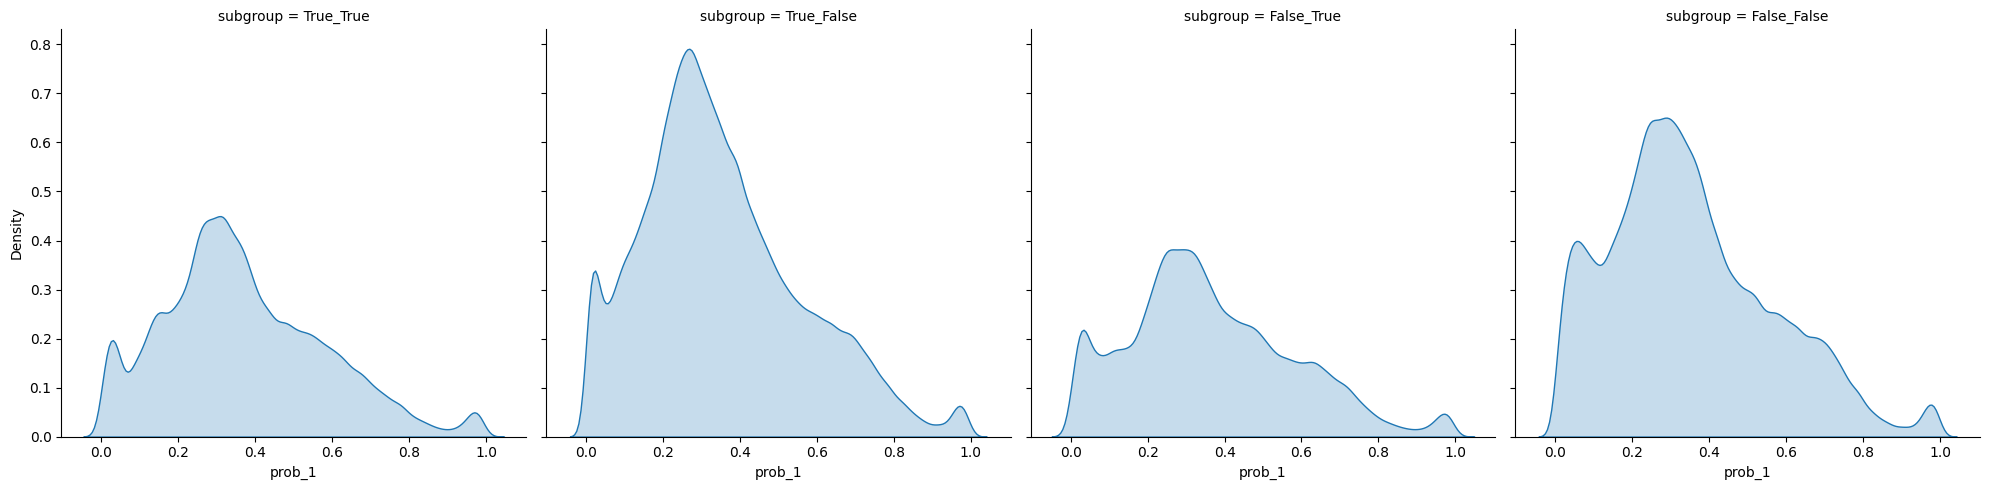

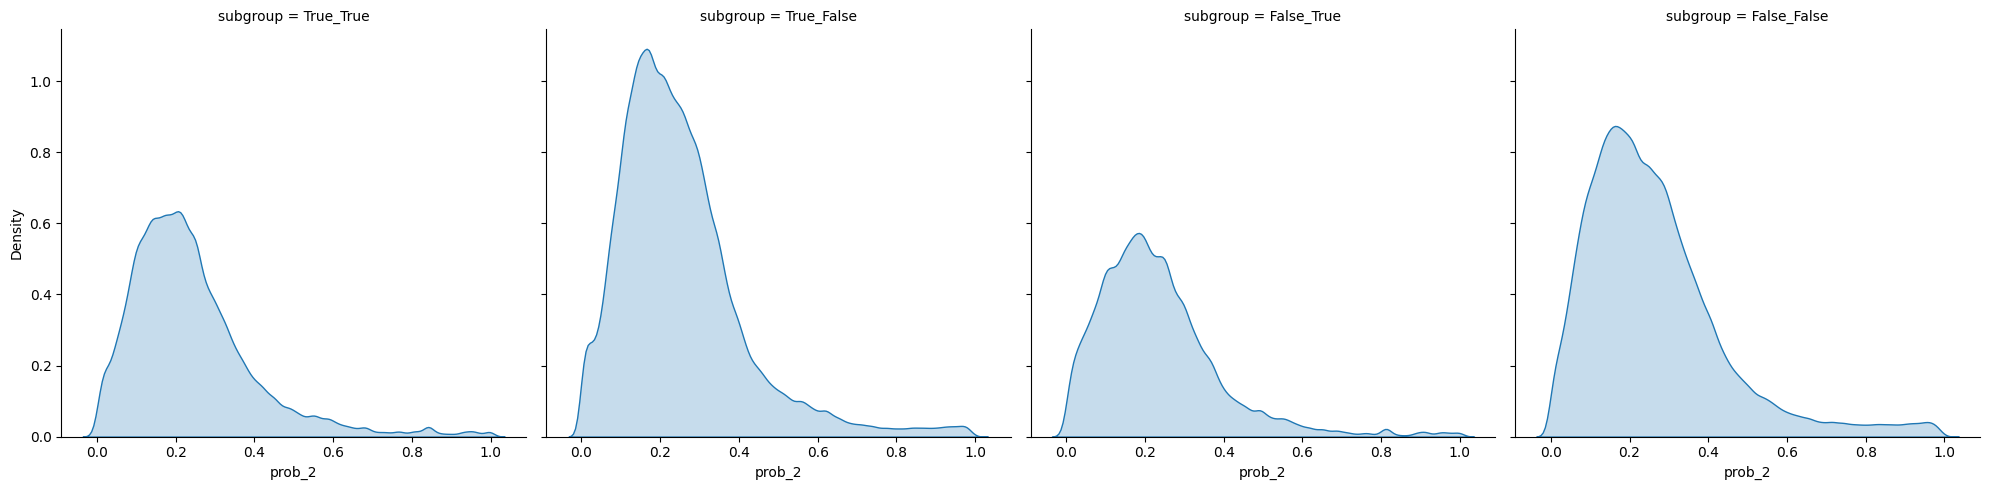

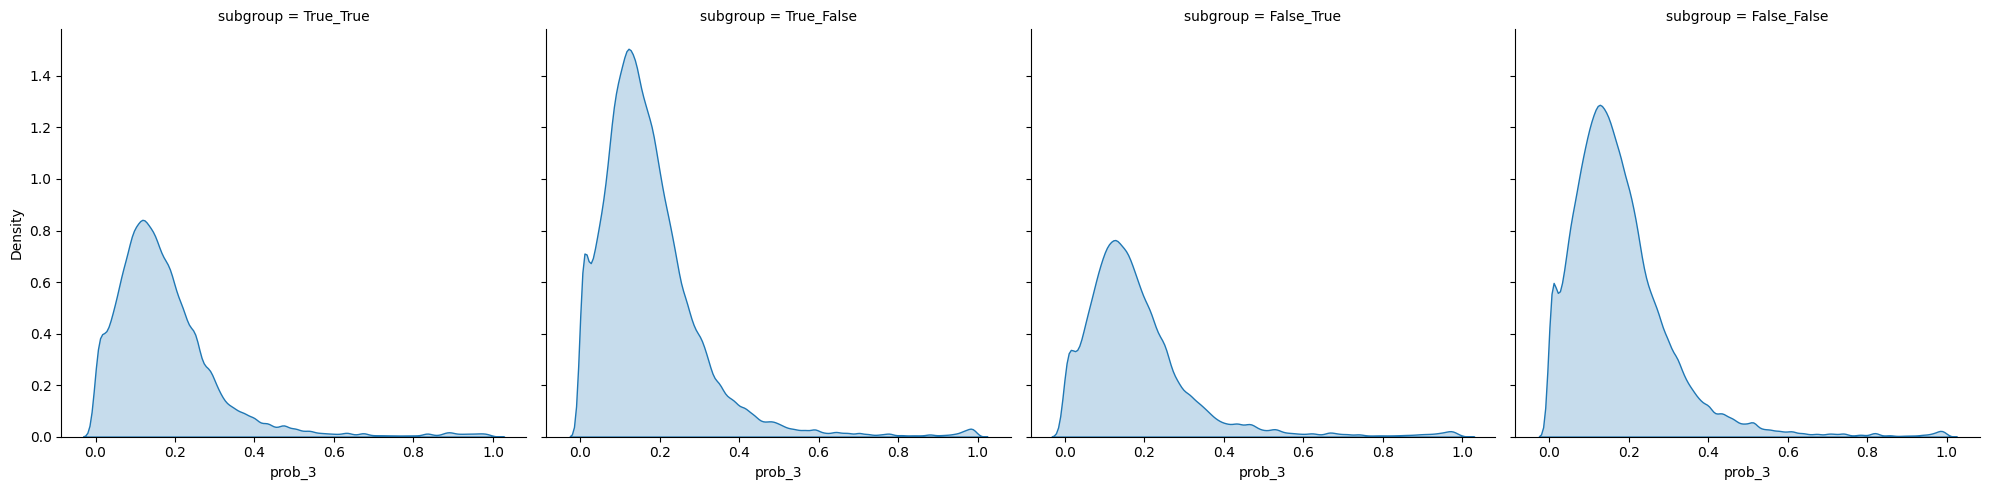

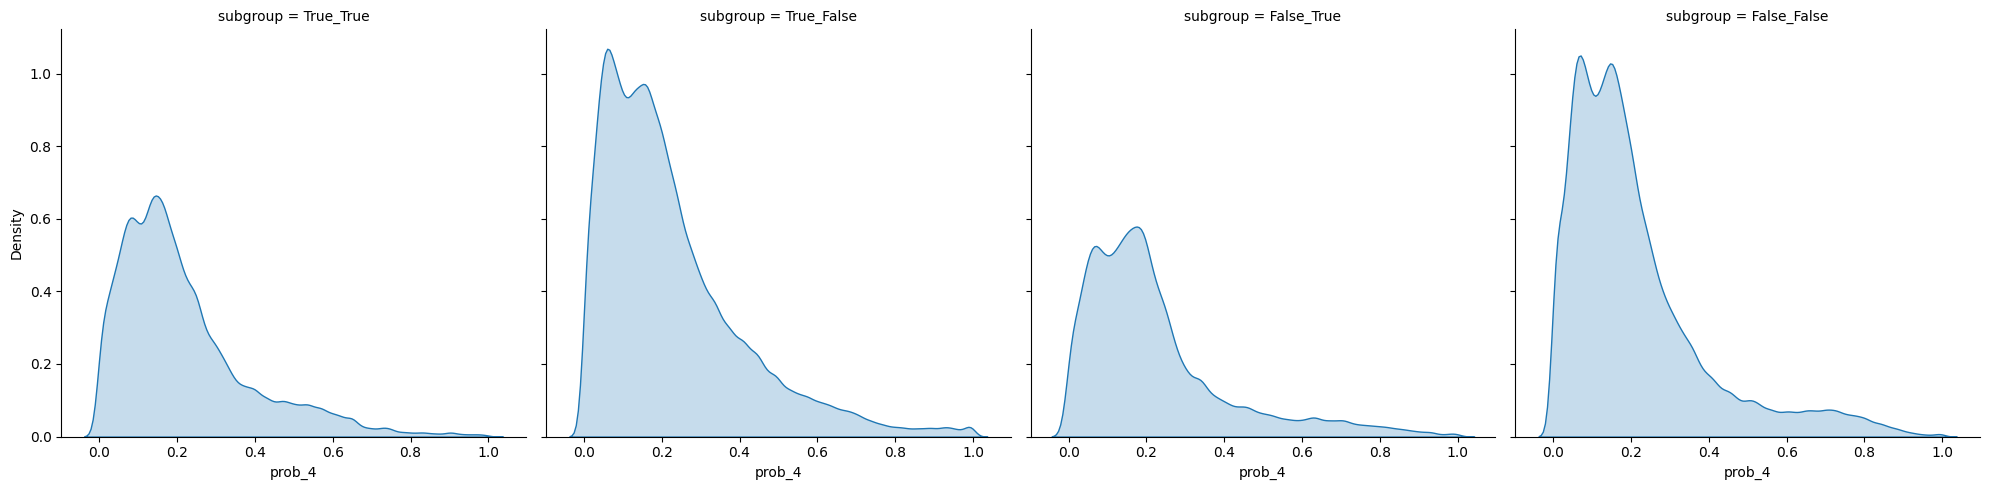

In [14]:

BARRAT_data["subgroup"] = BARRAT_data["flipped"].astype(str) + "_" + BARRAT_data["reverse_coded"].astype(str)


sns.displot(
    BARRAT_data,
    x="prob_1",
    col="subgroup",
    kind="kde",
    fill=True
)
plt.show()

sns.displot(
    BARRAT_data,
    x="prob_2",
    col="subgroup",
    kind="kde",
    fill=True
)

sns.displot(
    BARRAT_data,
    x="prob_3",
    col="subgroup",
    kind="kde",
    fill=True
)

sns.displot(
    BARRAT_data,
    x="prob_4",
    col="subgroup",
    kind="kde",
    fill=True
)
plt.show()


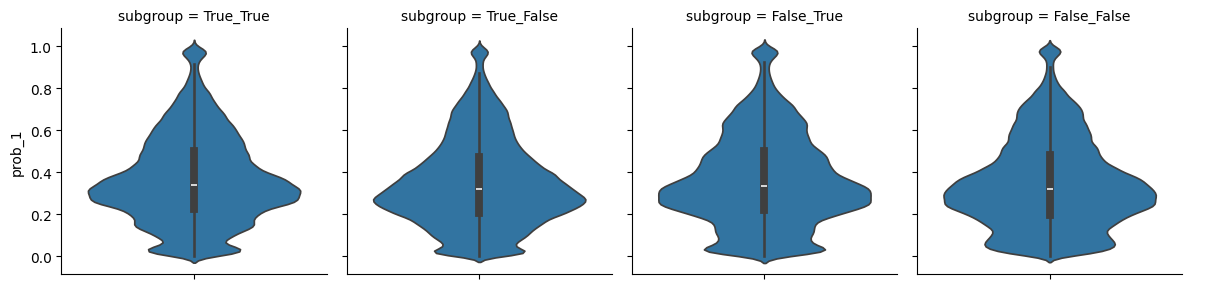

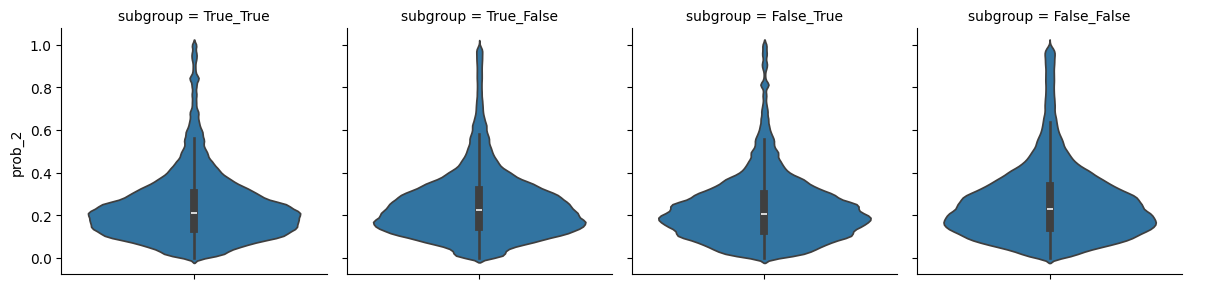

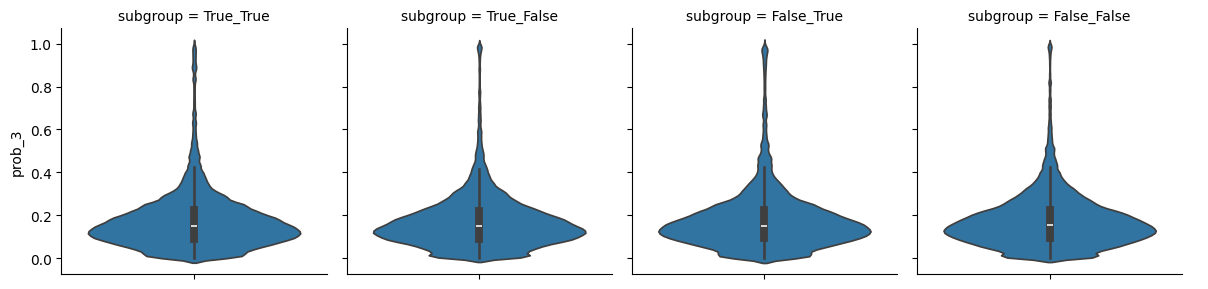

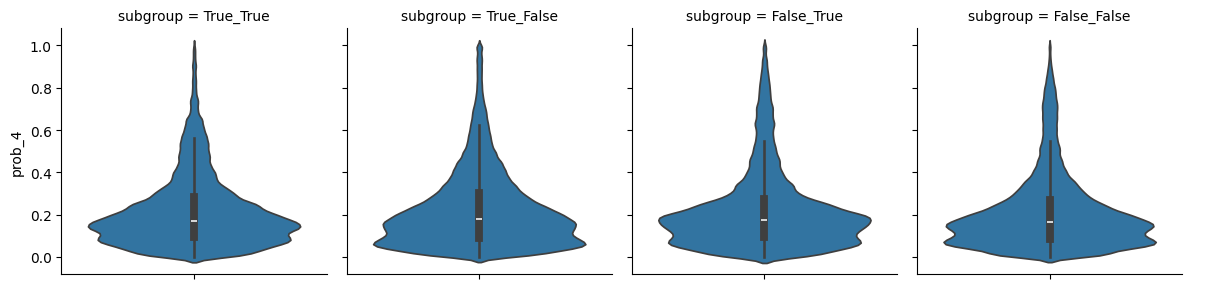

In [15]:
for var in ["prob_1", "prob_2", "prob_3", "prob_4"]:
    sns.catplot(
        data=BARRAT_data,
        y=var,
        col="subgroup",
        kind="violin",
        height=3,
        aspect=1
    )


# Test bias also on unchanged itemlevel data

In [17]:
unchanged_data = pd.read_csv("processed_data/no_change_item_data.csv")

/var/folders/g6/6tx7kz_51_92m63qx0q2c2lw0000gn/T/ipykernel_7059/1841406526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSSV_data["reverse_coded"] = SSSV_data["item"].astype(int).map(reverse_coded)
/var/folders/g6/6tx7kz_51_92m63qx0q2c2lw0000gn/T/ipykernel_7059/1841406526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSSV_data["subgroup"] =  SSSV_data["reverse_coded"].astype(str)


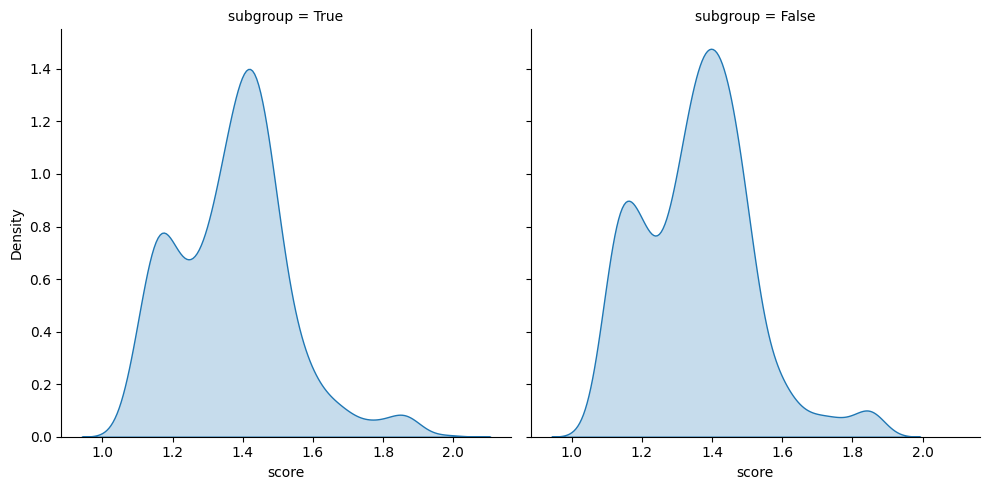

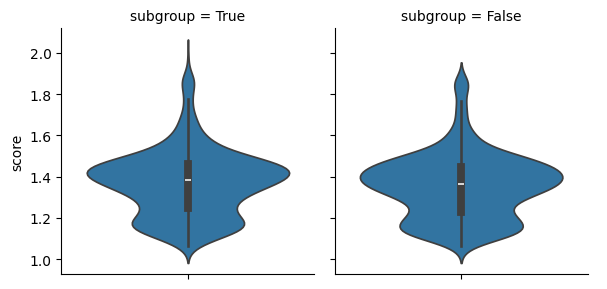

In [ ]:
SSSV_data = unchanged_data[unchanged_data["experiment"]=="SSSV scale"]

# add whether item was reverse coded
reverse_coded = {
     1: True, 2: False, 3: True, 4: False, 5: True, 6: True, 7: False, 8: True, 9: True, 10: False, 
     11: False, 12: False, 13: False, 14: True, 15: False, 16: True, 17: True, 18: True, 19: False, 20: False,
     21: False, 22: True, 23: True, 24: True, 25: False, 26: False, 27: False, 28: True, 29: True, 30: False,
     31: False, 32: True, 33: False, 34: True, 35: False, 36: True, 37: False, 38: False, 39: True, 40: False

}

# Apply mapping row-wise based on item number
SSSV_data["reverse_coded"] = SSSV_data["item"].astype(int).map(reverse_coded)

SSSV_data["subgroup"] =  SSSV_data["reverse_coded"].astype(str)

sns.displot(
    SSSV_data,
    x="score",
    col="subgroup",
    kind="kde",
    fill=True
)
plt.show()

sns.catplot(
    data=SSSV_data,
    y="score",
    col="subgroup",
    kind="violin",
    height=3,
    aspect=1
)


/var/folders/g6/6tx7kz_51_92m63qx0q2c2lw0000gn/T/ipykernel_7059/1848981494.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BARRAT_data["reverse_coded"] = BARRAT_data["item"].astype(int).map(reverse_coded)
/var/folders/g6/6tx7kz_51_92m63qx0q2c2lw0000gn/T/ipykernel_7059/1848981494.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BARRAT_data["subgroup"] =  BARRAT_data["reverse_coded"].astype(str)


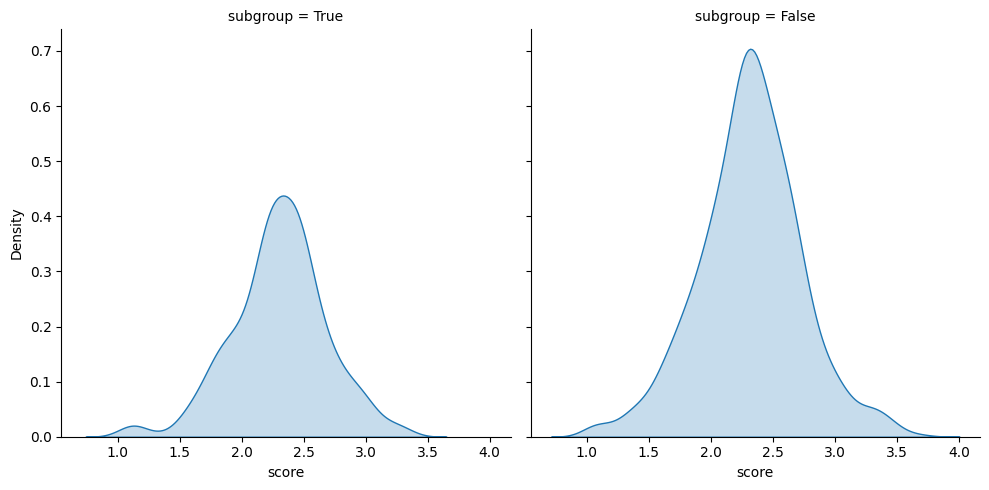

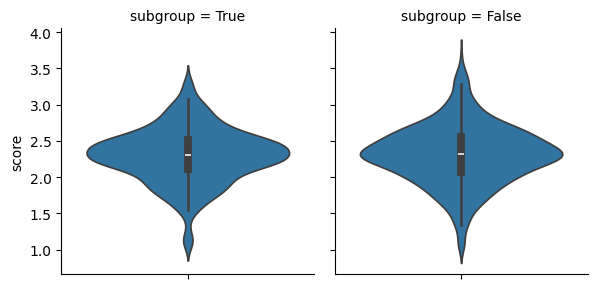

In [31]:
BARRAT_data = unchanged_data[unchanged_data["experiment"]=="BARRAT scale"]

# add whether item was reverse coded
reverse_coded = {
    1: True, 2: False, 3: False,  4: False, 5: False,  6: False,  7: True,  8: True,  9: True,  10: True,
    11: False, 12: True, 13: True,  14: False, 15: True,  16: False,  17: False,  18: False,  19: False,  20: True,
    21: False, 22: False, 23: False,  24: False, 25: False,  26: False,  27: False,  28: False,  29: True,  30: True
    }

# Apply mapping row-wise based on item number
BARRAT_data["reverse_coded"] = BARRAT_data["item"].astype(int).map(reverse_coded)


BARRAT_data["subgroup"] =  BARRAT_data["reverse_coded"].astype(str)

sns.displot(
    BARRAT_data,
    x="score",
    col="subgroup",
    kind="kde",
    fill=True
)
plt.show()

sns.catplot(
    data=BARRAT_data,
    y="score",
    col="subgroup",
    kind="violin",
    height=3,
    aspect=1
)
